In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [2]:
TaxiDf = pd.read_csv("dirty_taxi_data.csv")

## Data Exploration

In [3]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
TaxiDf.head()

First 5 rows of the dataset:


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-01-16 20:06:00.000000168,3.3,2010-01-16 20:06:00 UTC,-73.953323,40.778532,-73.953375,40.772505,error_1.0
1,2010-09-22 23:21:00.00000065,6.5,2010-09-22 23:21:00 UTC,-73.985542,40.738333,-74.003350,40.738935,1.0
2,2013-10-17 18:40:14.0000001,5.0,2013-10-17 18:40:14 UTC,-73.999945,40.718097,-73.999239,40.723103,1.0
3,2015-06-09 19:39:42.0000009,40.5,2015-06-09 19:39:42 UTC,-73.974533,40.756237,-73.923149,40.867210,1.0
4,2012-05-01 07:16:59.0000001,7.7,2012-05-01 07:16:59 UTC,-73.952835,40.786351,-73.974022,40.762765,1.0


In [4]:
# Display the last few rows of the dataset
print("\nLast 5 rows of the dataset:")
TaxiDf.tail()


Last 5 rows of the dataset:


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
114995,2012-10-20 13:50:00.00000091,165.0,2012-10-20 13:50:00 UTC,-74.006435,40.732602,-73.980660,40.733897,1.0
114996,2012-04-04 20:05:00.000000261,4.5,2012-04-04 20:05:00 UTC,-73.955827,40.767640,-73.964683,40.762422,1.0
114997,2010-01-25 22:46:15.0000004,NaN,2010-01-25 22:46:15 UTC,-74.007678,40.711676,-73.997685,40.678757,1.0
114998,2009-06-11 22:02:45.0000002,12.5,2009-06-11 22:02:45 UTC,-74.002465,40.707247,-73.976805,40.751910,1.0
114999,2013-02-13 17:03:34.0000002,6.5,2013-02-13 17:03:34 UTC,-73.972745,40.759291,-73.980035,40.751461,1.0


In [5]:
# Display the basic information about the dataset (column names, non-null counts, data types)
print("\nBasic information about the dataset:")
TaxiDf.info()


Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115000 entries, 0 to 114999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                115000 non-null  object 
 1   fare_amount        92160 non-null   float64
 2   pickup_datetime    115000 non-null  object 
 3   pickup_longitude   115000 non-null  float64
 4   pickup_latitude    115000 non-null  float64
 5   dropoff_longitude  115000 non-null  float64
 6   dropoff_latitude   115000 non-null  float64
 7   passenger_count    93074 non-null   object 
dtypes: float64(5), object(3)
memory usage: 7.0+ MB


=> "passenger_count" is an object column, it should be float

In [6]:
# Display basic statistics (mean, standard deviation, min, max, etc.)
print("\nSummary statistics of numerical columns:")
describe=pd.DataFrame(TaxiDf.describe())
describe


Summary statistics of numerical columns:


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,92160.000000,115000.000000,115000.000000,115000.000000,115000.000000
mean,16.431745,-72.559159,39.946204,-72.566149,39.939186
std,32.339641,10.650615,6.020752,10.218077,11.215051
min,-25.000000,-736.400000,-74.008970,-90.239125,-3114.304848
25%,6.100000,-73.992103,40.734890,-73.991481,40.734044
50%,8.500000,-73.981890,40.752672,-73.980078,40.753122
75%,13.700000,-73.967190,40.767137,-73.963695,40.768010
max,1456.600000,40.808197,90.016667,40.814702,407.000000


=> huge difference between the min and max value in "fare_amount" column 

In [7]:
# Check for missing values
print("\nMissing values in each column:")
TaxiDf.isnull().sum()


Missing values in each column:


key                      0
fare_amount          22840
pickup_datetime          0
pickup_longitude         0
pickup_latitude          0
dropoff_longitude        0
dropoff_latitude         0
passenger_count      21926
dtype: int64

=> missign values for "fare_amount" and "passenger_count" columns

In [8]:
# Check the shape of the dataset (number of rows and columns)
print("\nShape of the dataset (rows, columns):")
print(TaxiDf.shape)


Shape of the dataset (rows, columns):
(115000, 8)


In [9]:
# Display the data types of each column
print("\nData types of each column:")
TaxiDf.dtypes


Data types of each column:


key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count       object
dtype: object


Correlation matrix:


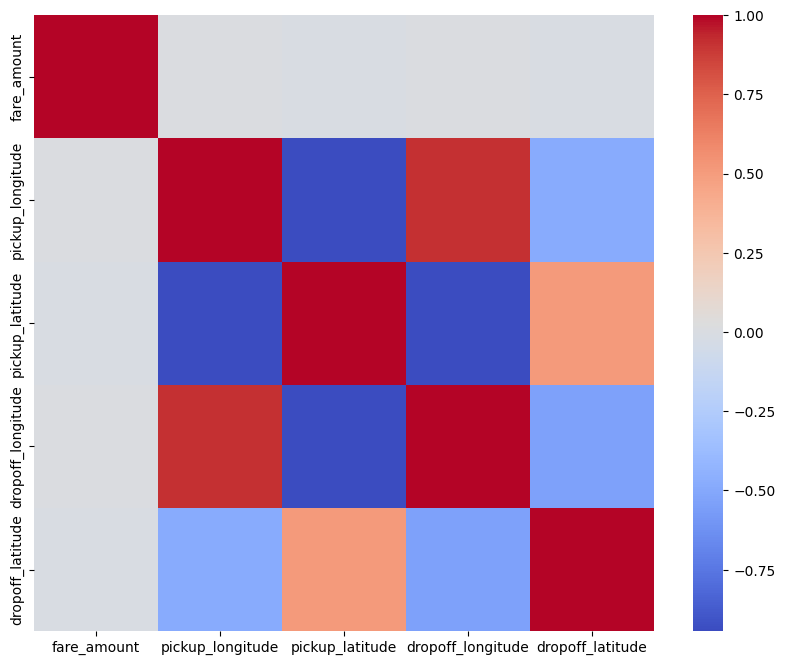

In [10]:
# Display the correlation matrix (for numerical data)
print("\nCorrelation matrix:")
numerical_df = TaxiDf[describe.columns]
correlation_matrix=numerical_df.corr()

# Create the heatmap
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, cmap = 'coolwarm')
plt.show()

In [11]:
# Display unique values for each column
for column in TaxiDf.columns:
    unique_values = TaxiDf[column].unique()
    print(f"Unique values in column '{column}': {len(unique_values)} unique value")
    print(unique_values)
    print("\n")  

Unique values in column 'key': 100000 unique value
['2010-01-16 20:06:00.000000168' '2010-09-22 23:21:00.00000065'
 '2013-10-17 18:40:14.0000001' ... '2010-11-21 01:41:56.0000002'
 '2015-02-14 14:49:34.0000008' '2009-01-14 08:49:00.000000263']


Unique values in column 'fare_amount': 1046 unique value
[   3.3    6.5    5.  ...  370.7   79.  1456.6]


Unique values in column 'pickup_datetime': 98194 unique value
['2010-01-16 20:06:00 UTC' '2010-09-22 23:21:00 UTC'
 '2013-10-17 18:40:14 UTC' ... '2011-10-07 22:39:00 UTC'
 '11-15-2009 18:46' '2010-01-25 22:46:15 UTC']


Unique values in column 'pickup_longitude': 51942 unique value
[-73.953323 -73.985542 -73.999945 ... -73.975191 -73.996433 -73.986628]


Unique values in column 'pickup_latitude': 58204 unique value
[40.778532   40.738333   40.718097   ... 40.746738   40.735383
 40.75025177]


Unique values in column 'dropoff_longitude': 54557 unique value
[-73.953375 -74.00335  -73.999239 ... -73.986771 -73.976727 -73.981338]


Unique val

=> "passenger_count" column should be fixed (invalid values) and its type would be float 

## Data Cleaning

##### - "passenger_count" column :

In [12]:
# Display value counts for a specific column
def value_count(column_name,df):
    print(f"\nValue counts for column {column_name}:")
    print(df[column_name].value_counts())

In [13]:
value_count("passenger_count",TaxiDf)


Value counts for column passenger_count:
passenger_count
1.0          60568
2.0          12742
5.0           6053
3.0           3872
error_1.0     3220
4.0           1889
6.0           1857
error_nan     1129
error_2.0      698
0.0            343
error_5.0      294
error_3.0      202
error_4.0       97
error_6.0       96
error_0.0       14
Name: count, dtype: int64


In [14]:
# Replace "error_1".. with the corresponding value 
repl_dict={"error_nan":"0.0", "error_0.0":"0.0", "error_1.0":"1.0", "error_2.0":"2.0", "error_3.0":"3.0", "error_4.0":"4.0", "error_5.0":"5.0", "error_6.0":"6.0"}
for old, new in repl_dict.items():
    TaxiDf["passenger_count"] = TaxiDf["passenger_count"].str.replace(old,new)

In [15]:
value_count("passenger_count",TaxiDf)


Value counts for column passenger_count:
passenger_count
1.0    63788
2.0    13440
5.0     6347
3.0     4074
4.0     1986
6.0     1953
0.0     1486
Name: count, dtype: int64



- It is impossible to have 0 passenger => replace them with the mean

In [16]:
#change column type
TaxiDf["passenger_count"]=TaxiDf["passenger_count"].astype(float)
#replace with the mean
mean=TaxiDf["passenger_count"].mean()
TaxiDf["passenger_count"] = TaxiDf["passenger_count"].replace(0.0,round(mean))

percentage of missing values is 21926/115000 = 0.1906608696 >> 0.05 => we can't drop it 

In [17]:
#replace missing values with the mean
TaxiDf["passenger_count"] = TaxiDf["passenger_count"].fillna(value=mean)

In [18]:
# Drop rows where 'passenger_count' is either 'error_nan' or '0.0'
TaxiDf = TaxiDf[~TaxiDf["passenger_count"].isin(["error_nan", "0.0"])]

In [19]:
value_count("passenger_count",TaxiDf)


Value counts for column passenger_count:
passenger_count
1.000000    63788
1.657681    21926
2.000000    14926
5.000000     6347
3.000000     4074
4.000000     1986
6.000000     1953
Name: count, dtype: int64


##### - "fare_amount" column :

In [20]:
TaxiDf.dropna(subset=["fare_amount"], inplace=True)

In [21]:
# Check for missing values
print("\nMissing values in each column:")
TaxiDf.isnull().sum()


Missing values in each column:


key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [22]:
# Check the shape of the dataset (number of rows and columns)
print("\nShape of the dataset (rows, columns):")
print(TaxiDf.shape) 


Shape of the dataset (rows, columns):
(92160, 8)


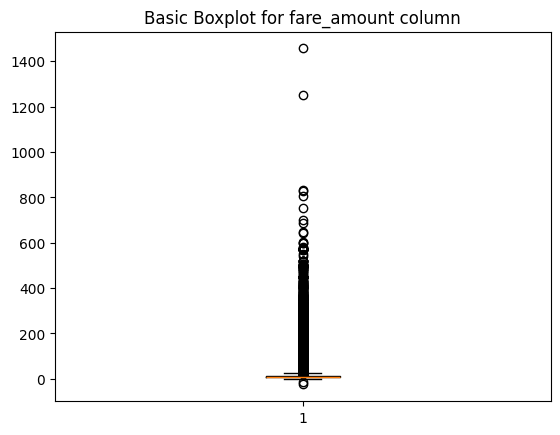

In [23]:
# boxplot for data features
plt.boxplot(x="fare_amount", data=TaxiDf) 
plt.title('Basic Boxplot for fare_amount column')
plt.show()

In [24]:
# dropping duplicates
duplicates=TaxiDf[TaxiDf.duplicated()]
print("number of duplicates: ",len(duplicates))
TaxiDf.drop(duplicates.index, inplace=True)

number of duplicates:  8693


# splitting the data


In [25]:

# Scaling variables
scaler = StandardScaler()
describe_scaled = scaler.fit_transform(describe) #describe contains only numeric features from TaxiDf
scaled_TaxiDf = pd.DataFrame(describe_scaled, 
                         columns=describe.columns)
scaled_TaxiDf


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,2.645430,2.645702,2.645750,2.645750,2.644735
1,-0.384465,-0.376189,-0.377606,-0.378618,-0.367289
2,-0.383942,-0.374003,-0.378498,-0.376443,-0.368041
3,-0.385828,-0.393621,-0.380603,-0.379083,-0.449932
4,-0.384805,-0.376226,-0.377585,-0.378656,-0.367268
5,-0.384726,-0.376226,-0.377585,-0.378656,-0.367267
6,-0.384555,-0.376226,-0.377584,-0.378655,-0.367267
7,-0.337109,-0.373211,-0.376289,-0.375639,-0.357671


In [26]:
X=scaled_TaxiDf.drop(["fare_amount"],axis=1)
y=scaled_TaxiDf[["fare_amount"]]

In [27]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse


In [28]:
models_result={}

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Model1: Linear Regression

In [30]:

reg = LinearRegression()
lr_mse = evaluate_model(reg, X_train, X_test, y_train, y_test)
print(" Linear Regression MSE :", lr_mse)
models_result["LinearRegression"]=lr_mse
print("\nmodels result:",models_result)


 Linear Regression MSE : 343016.6935184985

models result: {'LinearRegression': np.float64(343016.6935184985)}


### Model2: Ridge 

In [31]:
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge_mse = evaluate_model(ridge, X_train, X_test, y_train, y_test)
    ridge_scores.append(ridge_mse)
print(ridge_scores)
best_redge_mse=min(ridge_scores)
print("Redge MSE:", best_redge_mse)
best_alpha=alphas[0]
models_result["Ridge"]=best_redge_mse
print("\nmodels result:",models_result)

[np.float64(2.9434039835924932), np.float64(3.0311636973706833), np.float64(3.0405102251210834), np.float64(3.041450972752491), np.float64(3.0415451088798098), np.float64(3.0415545231066026)]
Redge MSE: 2.9434039835924932

models result: {'LinearRegression': np.float64(343016.6935184985), 'Ridge': np.float64(2.9434039835924932)}


### Model 3 : Random Forest Regressor

In [32]:
rf = RandomForestRegressor(random_state=42)
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                                   n_iter=10, scoring='neg_mean_squared_error', 
                                   cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
best_rf = random_search.best_estimator_

print("Best parameters for RandomForest:", random_search.best_params_)
RF_mse = evaluate_model(best_rf, X_train, X_test, y_train, y_test)
print(" Random Fores tRegressor MSE :", RF_mse)

models_result["RandomForestRegressor"]=RF_mse
print("\nmodels result:",models_result)

/Users/macmini/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/macmini/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/macmini/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/macmini/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array

Best parameters for RandomForest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
 Random Fores tRegressor MSE : 2.99385755859663

models result: {'LinearRegression': np.float64(343016.6935184985), 'Ridge': np.float64(2.9434039835924932), 'RandomForestRegressor': np.float64(2.99385755859663)}


In [33]:
# important features 
importances = best_rf.feature_importances_
print("fetaures impotances:", importances)

fetaures impotances: [0.25078724 0.27494666 0.24495287 0.22931324]


=> roughly same importances

### Model 4 : AdaBoostRegressor

In [34]:
ada = AdaBoostRegressor(random_state=42, n_estimators=100)
ada_mse = evaluate_model(ada, X_train, X_test, y_train, y_test)
print("AdaBoost MSE with selected features:", ada_mse)

models_result["AdaBoostRegressor"]=ada_mse
print("\nmodels result:",models_result)

AdaBoost MSE with selected features: 2.965179189258102

models result: {'LinearRegression': np.float64(343016.6935184985), 'Ridge': np.float64(2.9434039835924932), 'RandomForestRegressor': np.float64(2.99385755859663), 'AdaBoostRegressor': np.float64(2.965179189258102)}


/Users/macmini/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### model 5: Lasso

In [35]:
lasso = Lasso(alpha=0.3)  
lasso_mse = evaluate_model(lasso, X_train, X_test, y_train, y_test)
print("lasso :", lasso_mse)

models_result["Lasso"]=lasso_mse
print("\nmodels result:",models_result)

lasso : 3.041555569138694

models result: {'LinearRegression': np.float64(343016.6935184985), 'Ridge': np.float64(2.9434039835924932), 'RandomForestRegressor': np.float64(2.99385755859663), 'AdaBoostRegressor': np.float64(2.965179189258102), 'Lasso': np.float64(3.041555569138694)}


In [36]:
print("\nmodels result:",models_result)
print("Ridge is the most performant with MSE= ",best_redge_mse)


models result: {'LinearRegression': np.float64(343016.6935184985), 'Ridge': np.float64(2.9434039835924932), 'RandomForestRegressor': np.float64(2.99385755859663), 'AdaBoostRegressor': np.float64(2.965179189258102), 'Lasso': np.float64(3.041555569138694)}
Ridge is the most performant with MSE=  2.9434039835924932
